# Electromagnetic Waves

This week, we will look at the prototype for time-dependent electromagnetic fields: the electromagnet plane wave.

In [99]:
import numpy as np
import matplotlib.pyplot as plt
## Use this command to turn ON interactive plots:
#%matplotlib notebook
## Use this command to turn OFF interactive plots.
%matplotlib inline

## Maxwell's Equations

In the absence of any sources — charges or currents — Maxwell's equations give ***wave equations*** for the electric and magnetic fields:

\begin{align*}
\nabla^2 \vec{E} - \dfrac{\epsilon\mu}{c^2} \dfrac{\partial^2 \vec{E}}{\partial t^2} &= 0 \\
\nabla^2 \vec{B} - \dfrac{\epsilon\mu}{c^2} \dfrac{\partial^2 \vec{B}}{\partial t^2} &= 0
\end{align*}

These descirbe waves that propagate with a speed of $v = c / \sqrt{\mu\epsilon}$.

Any function $f(\vec{r} \pm \vec{v} t)$ is a solution of the wave equation.

Maxwell's equation impose additional constraints.  In particular,

\begin{align*}
\nabla \times \vec{E} &= \dfrac{1}{c} \dfrac{\partial \vec{B}}{\partial t} \\
\nabla \times \vec{B} &= -\dfrac{\mu\epsilon}{c} \dfrac{\partial \vec{E}}{\partial t}
\end{align*}

## Plane Waves

One solution to the wave equation is a ***plane wave***:

$$
f(\vec{r},t) = A \, e^{i(\vec{k} \cdot \vec{r} - \omega t)}
$$

The wave equation requires that $\omega = vk$.  If each component of $\vec{E}$ and $\vec{B}$ has this form, we call it an electromagnetic plane wave.  Maxwell's equations give the following relations:

\begin{align*}
\vec{k} \cdot \vec{E} &= 0 \\
\vec{k} \times \vec{E} &= \dfrac{\omega}{c} \vec{B} \\
\vec{k} \cdot \vec{B} &=0 \\
\vec{k} \times \vec{B} &= - \dfrac{\mu \epsilon \omega}{c} \vec{E}
\end{align*}

Let's look at this class of solution.

In [16]:
# Define the material.
mu = 1
epsilon = 1
n = np.sqrt(mu*epsilon)

# Define the wave vector.
# Give magnitude, lattitude, and longitdue.
k = 1 * np.pi
theta = 0 * np.pi
phi = 0 * np.pi

kx = k * np.sin(theta) * np.cos(phi)
ky = k * np.sin(theta) * np.sin(phi)
kz = k * np.cos(theta)

omega = k/n

# Set time.
t0 = 0

# Define the electric field, magnetic field, and Poynting vector
# for an electromagnetic plane wave.

# Give initial direction of electric field.
# Everything else is determined by this.
E0 = 0.25
B0 = np.sqrt(epsilon*mu) * E0

thetaE = 1.00 * np.pi
phiE = 1.00 * np.pi

Ex0 = E0 * np.sin(thetaE) * np.cos(phiE)
Ey0 = E0 * np.sin(thetaE) * np.sin(phiE)
Ez0 = E0 * np.cos(thetaE)

# Set phase difference between electric and magnetic fields.
alpha = 0.0 * np.pi

# Create a grid.
box_size = 2
num_points = 11

s = np.linspace(-box_size, box_size, num_points)
X, Y, Z = np.meshgrid(s,s,s)

# Compute the fields on a grid.
Ex = Ex0 * np.exp(1j*(kx*X + ky*Y + kz*Z - omega*t0))
Ey = Ey0 * np.exp(1j*(kx*X + ky*Y + kz*Z - omega*t0)) * np.exp(1j*alpha)
Ez = Ez0 * np.exp(1j*(kx*X + ky*Y + kz*Z - omega*t0))

Bx = (ky*Ez - kz*Ey)/omega
By = (kz*Ex - kx*Ez)/omega
Bz = (kx*Ey - ky*Ex)/omega

Sx = 1/(8*np.pi*mu) * (Ey * Bz.conj() - Ez * By.conj())
Sy = 1/(8*np.pi*mu) * (Ez * Bx.conj() - Ex * Bz.conj())
Sz = 1/(8*np.pi*mu) * (Ex * By.conj() - Ey * Bx.conj())

<IPython.core.display.Javascript object>


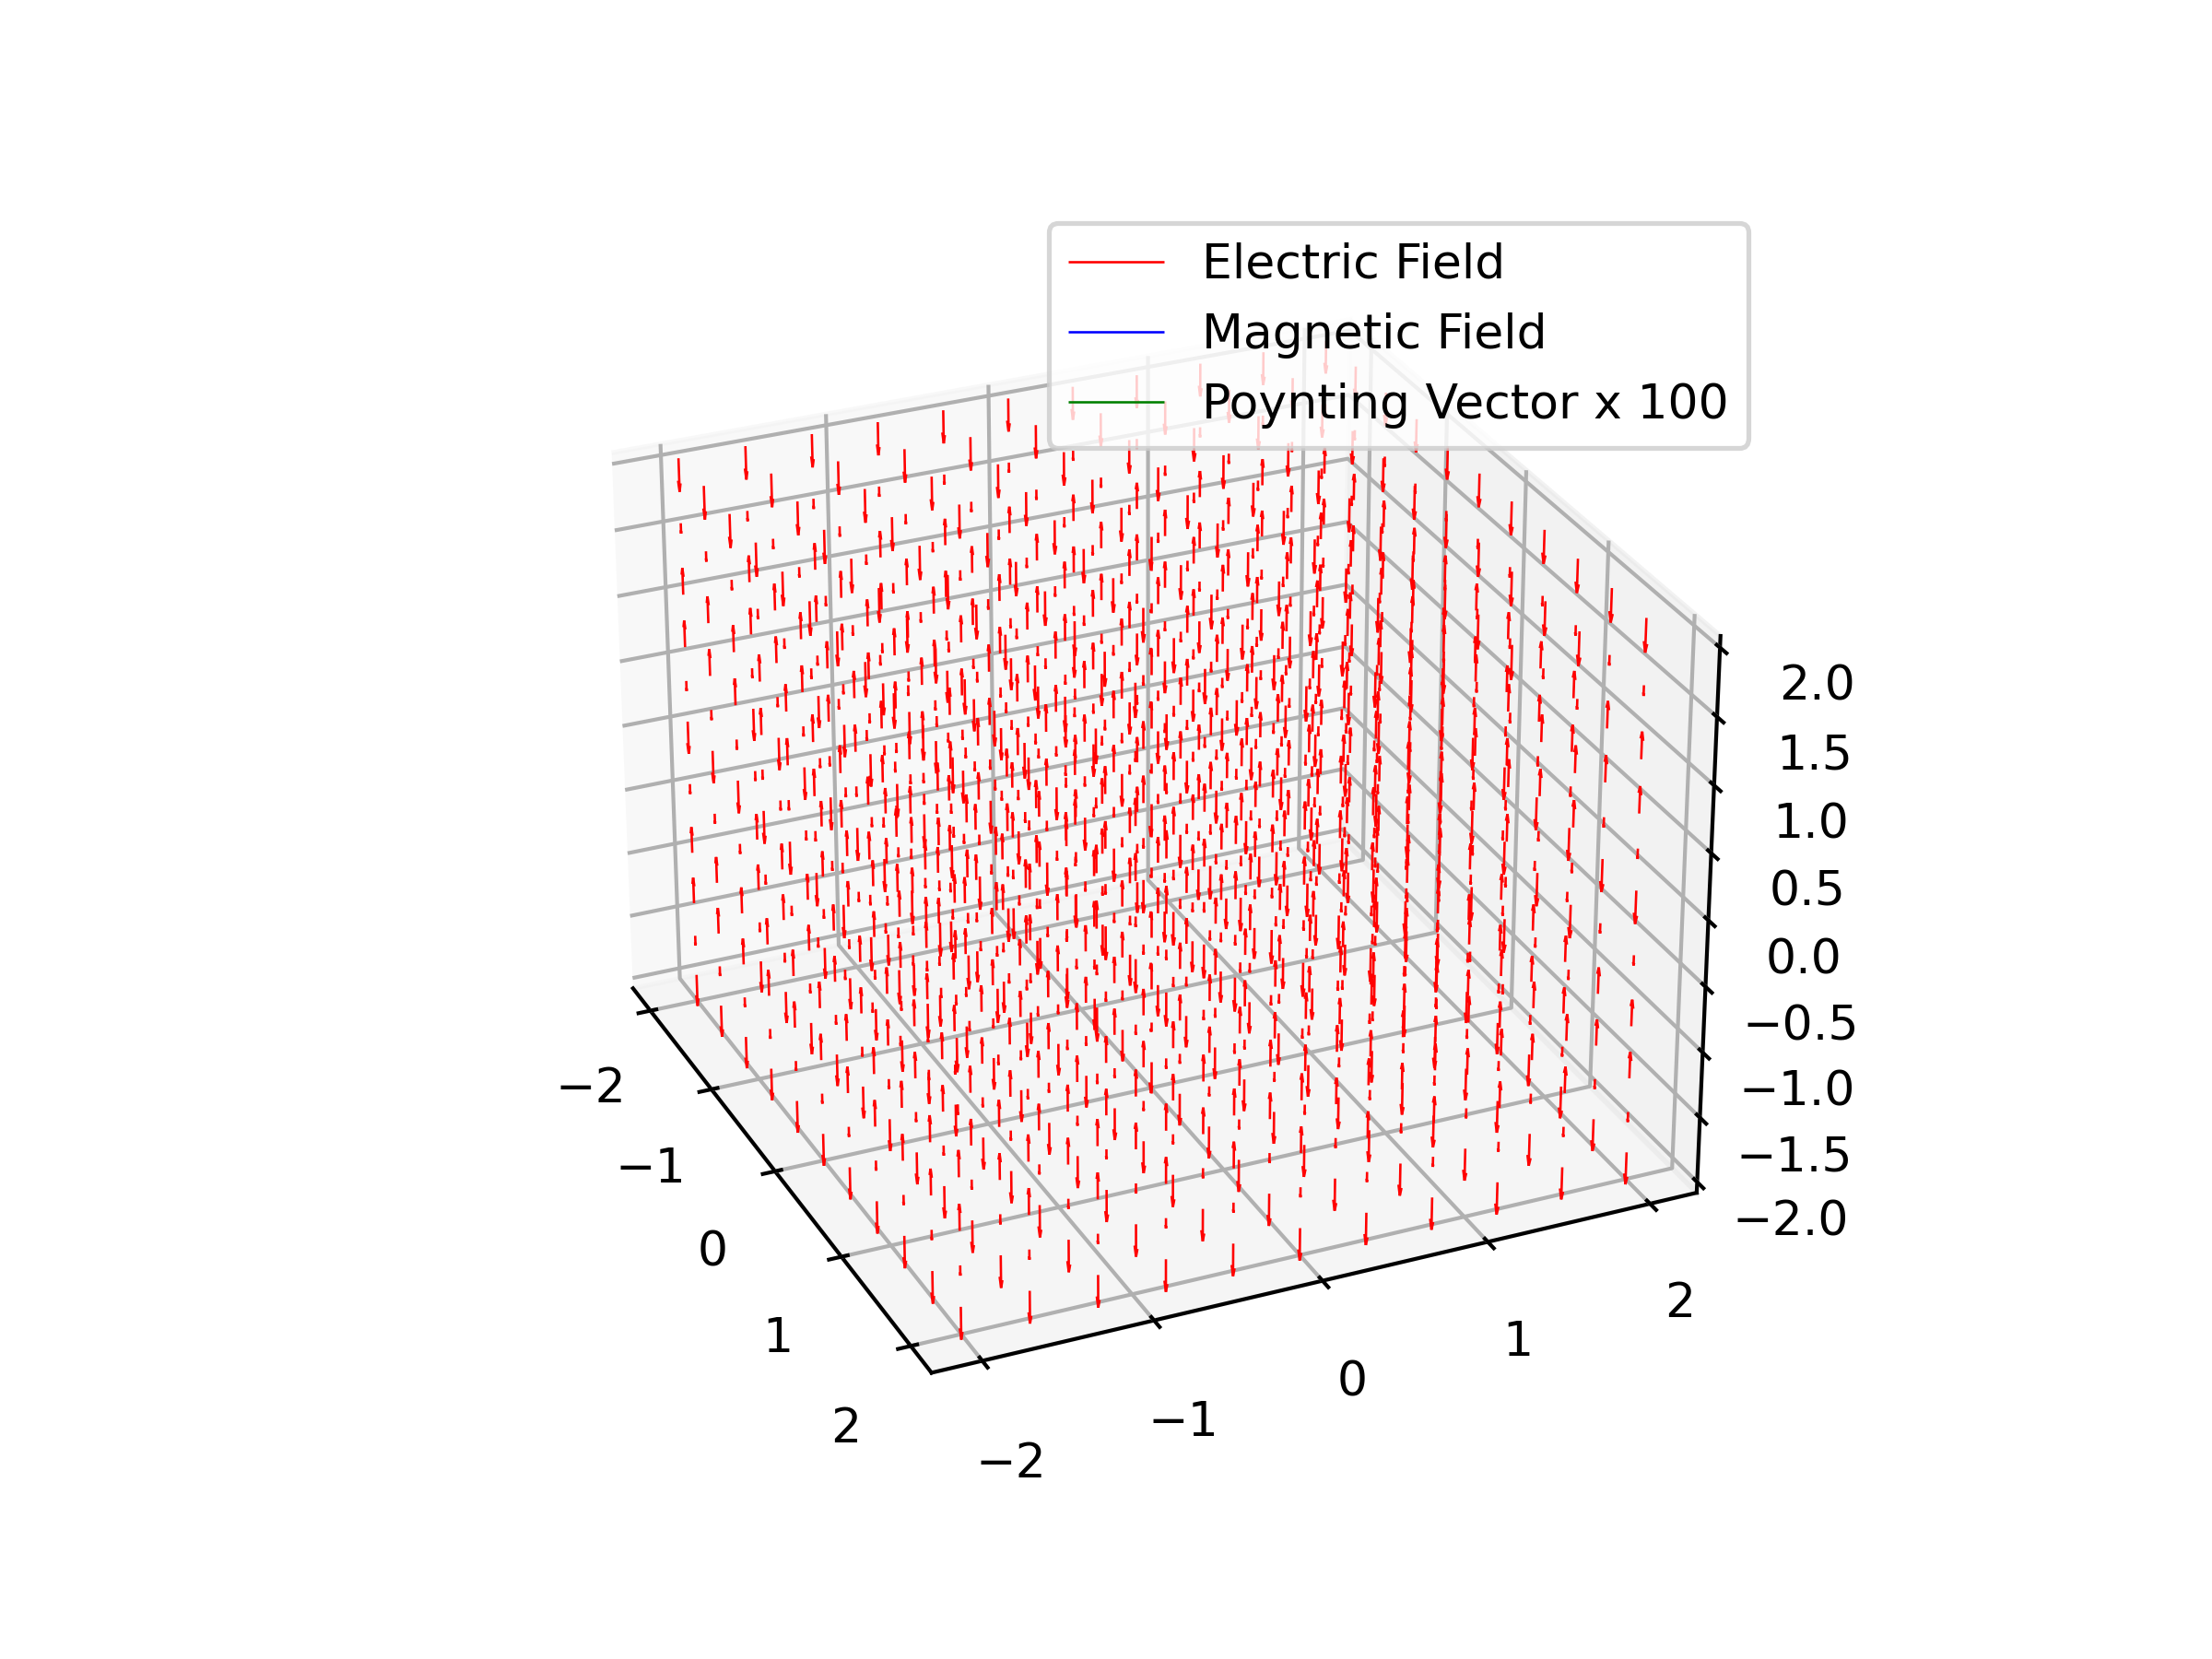

In [17]:
# Plot the field.
fig = plt.figure(dpi=300)
ax = fig.add_subplot(projection='3d')

ax.quiver3D(X,Y,Z, Ex.real, Ey.real, Ez.real, pivot='middle',
            linewidth=0.5, color='red', label='Electric Field')
ax.quiver3D(X,Y,Z, Bx.real, By.real, Bz.real, pivot='middle',
            linewidth=0.5, color='blue', label='Magnetic Field')
ax.quiver3D(X,Y,Z, 100*Sx.real, 100*Sy.real, 100*Sz.real, pivot='middle',
            linewidth=0.5, color='green', label='Poynting Vector x 100')
ax.legend()

<IPython.core.display.Javascript object>


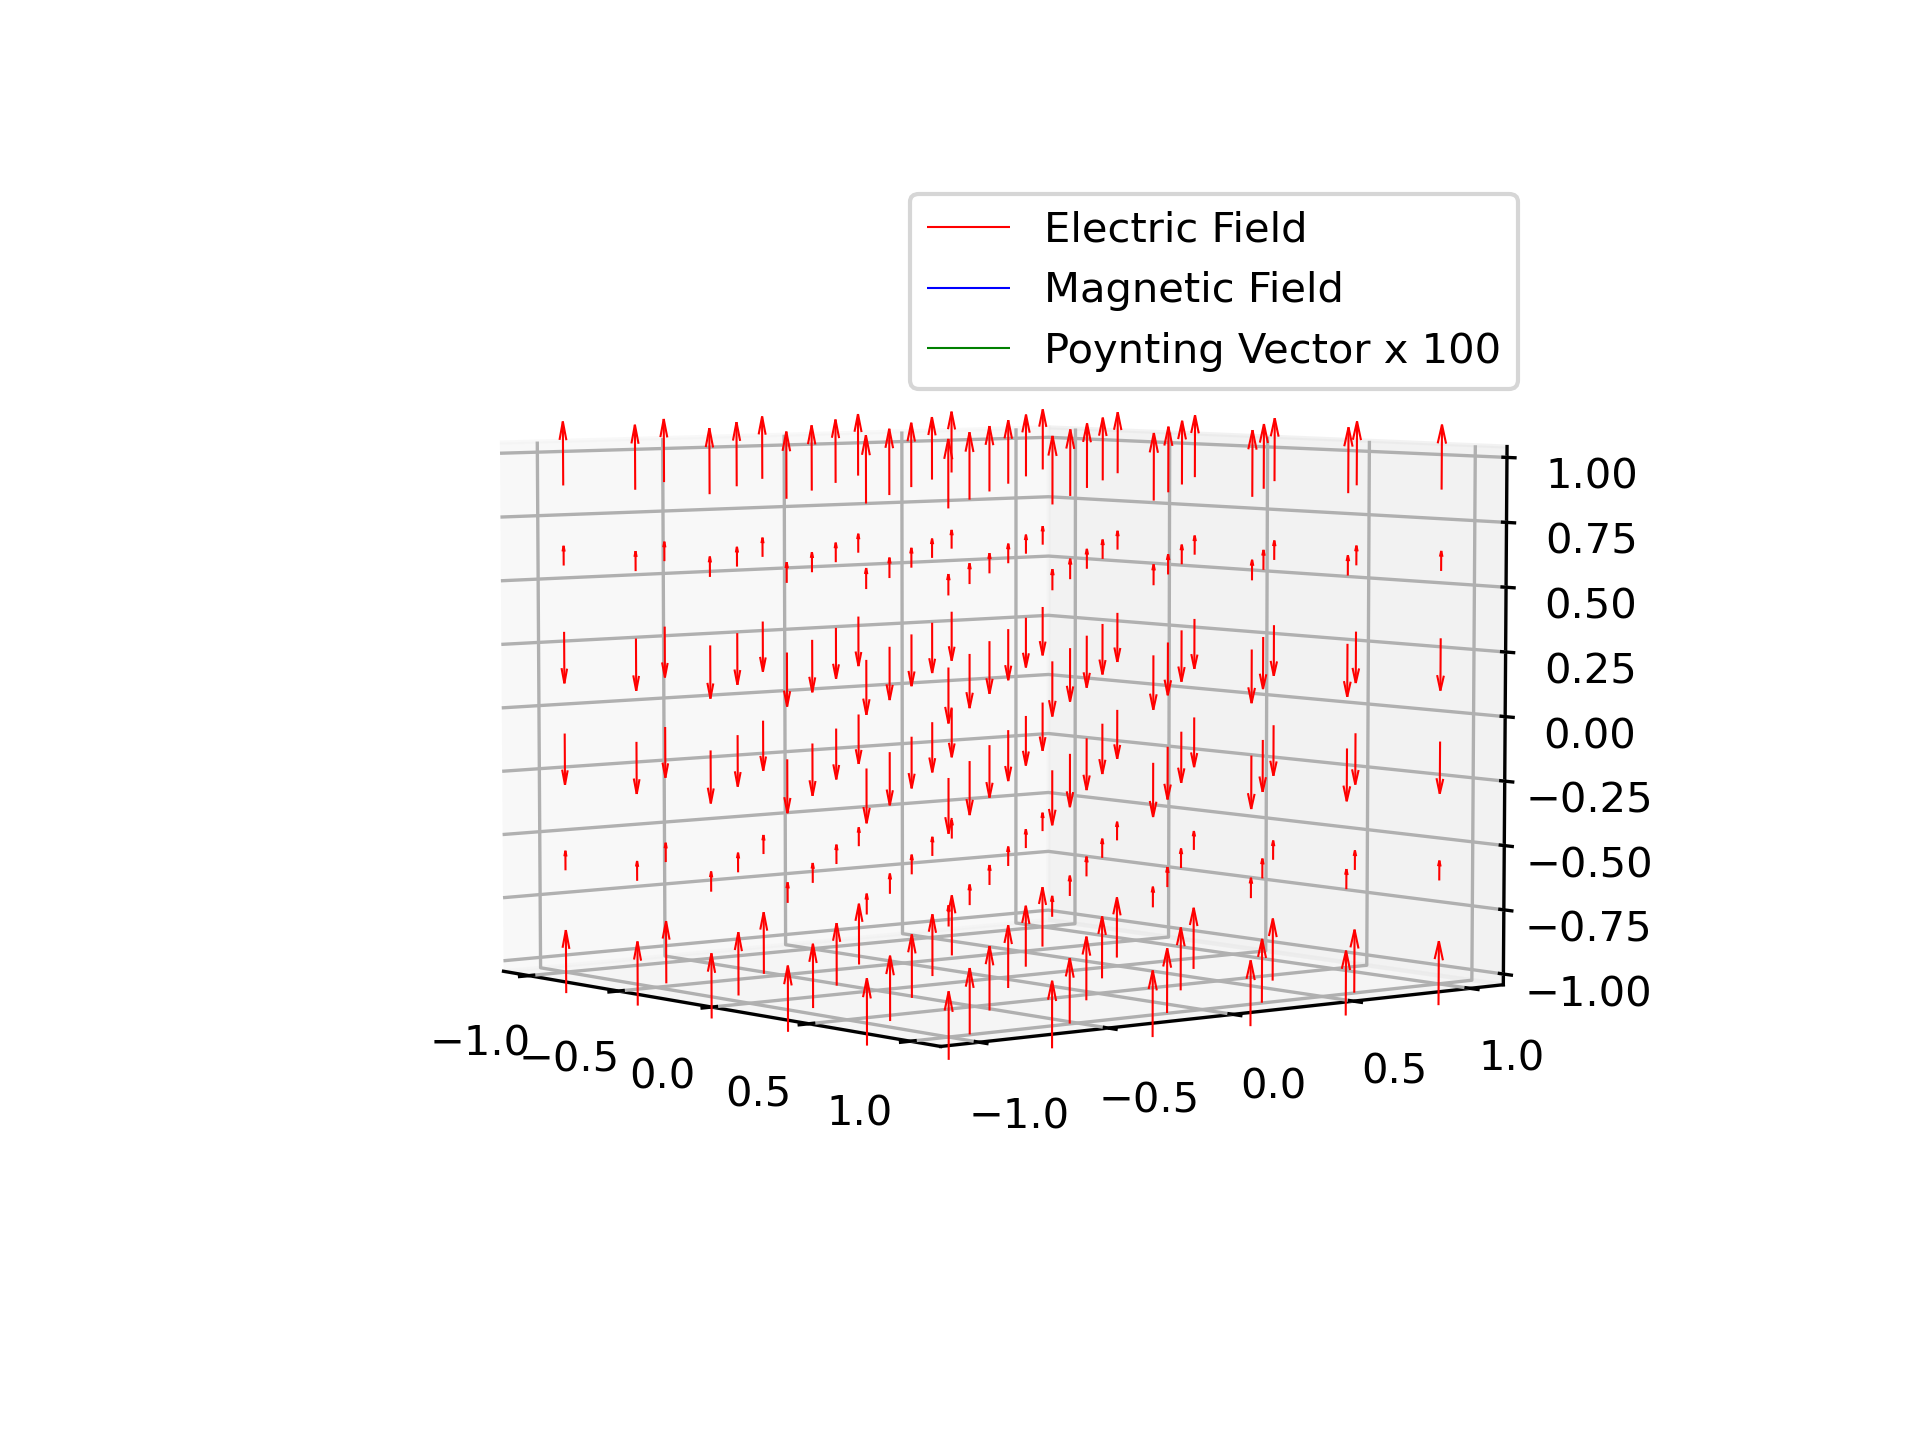

In [18]:
# Plot the field.
# Crop to see more detail.

# Create a grid.
box_size = 1
num_points = 6

s = np.linspace(-box_size, box_size, num_points)
X, Y, Z = np.meshgrid(s,s,s)

# Compute the fields on a grid.
ex = Ex0 * np.exp(1j*(kx*X + ky*Y + kz*Z - omega*t0))
ey = Ey0 * np.exp(1j*(kx*X + ky*Y + kz*Z - omega*t0)) * np.exp(1j*alpha)
ez = Ez0 * np.exp(1j*(kx*X + ky*Y + kz*Z - omega*t0))

bx = (ky*ez - kz*ey)/omega
by = (kz*ex - kx*ez)/omega
bz = (kx*ey - ky*ex)/omega

sx = 1/(8*np.pi*mu) * (ey * bz.conj() - ez * by.conj())
sy = 1/(8*np.pi*mu) * (ez * bx.conj() - ex * bz.conj())
sz = 1/(8*np.pi*mu) * (ex * by.conj() - ey * bx.conj())

# Make the plot.
fig = plt.figure(dpi=300)
ax = fig.add_subplot(projection='3d')

ax.quiver3D(X,Y,Z, ex.real, ey.real, ez.real, pivot='middle',
            linewidth=0.5, color='red', label='Electric Field')
ax.quiver3D(X,Y,Z, bx.real, by.real, bz.real, pivot='middle',
            linewidth=0.5, color='blue', label='Magnetic Field')
ax.quiver3D(X,Y,Z, 100*sx.real, 100*sy.real, 100*sz.real, pivot='middle',
            linewidth=0.5, color='green', label='Poynting Vector x 100')
ax.legend()

## Spatial Structure

Do your best to describe the spatial structure of the fields.

- In what direction does the electric field point?
- In what direction does the magnetic field point?
- In what direction does the Poynting vector point?
- How does this change as you move along the x, y, and z axes?

The electric and magnetic field seem to change, while the Poynting vector always points up. The electric field changes between -y to +y moving up the z axis. The magnetic field changes between -x and +x moving up the z axis

The magnitude of the wave vector in the last plot was $k = \pi$.  Change this value to $k = 2\pi$.  Describe how the spatial structure of the fields changes.

The electric and magnetic waves stay in their pervious direction longer when moving up the z axis. 

Change this value to $k = \pi/2$.  Describe how the spatial structure of the fields changes.

The electric field only points in the +x direction while the magnetic field only points in the +y direction.

The direction of $\vec{k}$ is defined by the polar angle $\theta$ and the azimuthal angle $\phi$.  Set $k = \pi$.  Change the ***direction*** of $\vec{k}$ — but not the magnitude — and describe your observations of the spatial structure of the fields.

- How does the direction of $\vec{k}$ affect the direction of $\vec{E}$?
- How does the direction of $\vec{k}$ affect the direction of $\vec{B}$?
- How does the direction of $\vec{k}$ affect the direction of $\vec{S}$?

The electric field still moves between -x and +x and the magnetic between -y and +y. However, the Poynting vector is now pointing down.

The direction of the electric field and the relative phase of its components defines the ***polarization*** of the wave.

Set $\vec{k}$ to point along the $z$-axis: $\theta = 0$ and $\phi=0$.

Vary the direction of the electric field by adjusting `thetaE` and `phiE` above.

- What happens to $\vec{E}$, $\vec{B}$, and $\vec{S}$ as you change `phiE` while holding `thetaE = 0.5 * np.pi`?
- What happens to $\vec{E}$, $\vec{B}$, and $\vec{S}$ as you change `thetaE` while holding `phiE = 0.0`?
- What directions of the electric field give the smallest Poynting vectors?

Holding thetaE and changing phiE,  $\vec{S}$  stay the same but $\vec{B}$ and $\vec{E}$ switched directions.

Holding phiE and changing thetaE, $\vec{S}$  stay the same but $\vec{B}$ and $\vec{E}$ switched directions.

Setting thetaE and phiE equal to each other cancels the magnetic and poynting vectors.

## Temporal Structure

Electromagnetic waves oscillate in space and time.

The code below will create two plots of the same electromagnetic plane wave at different times.

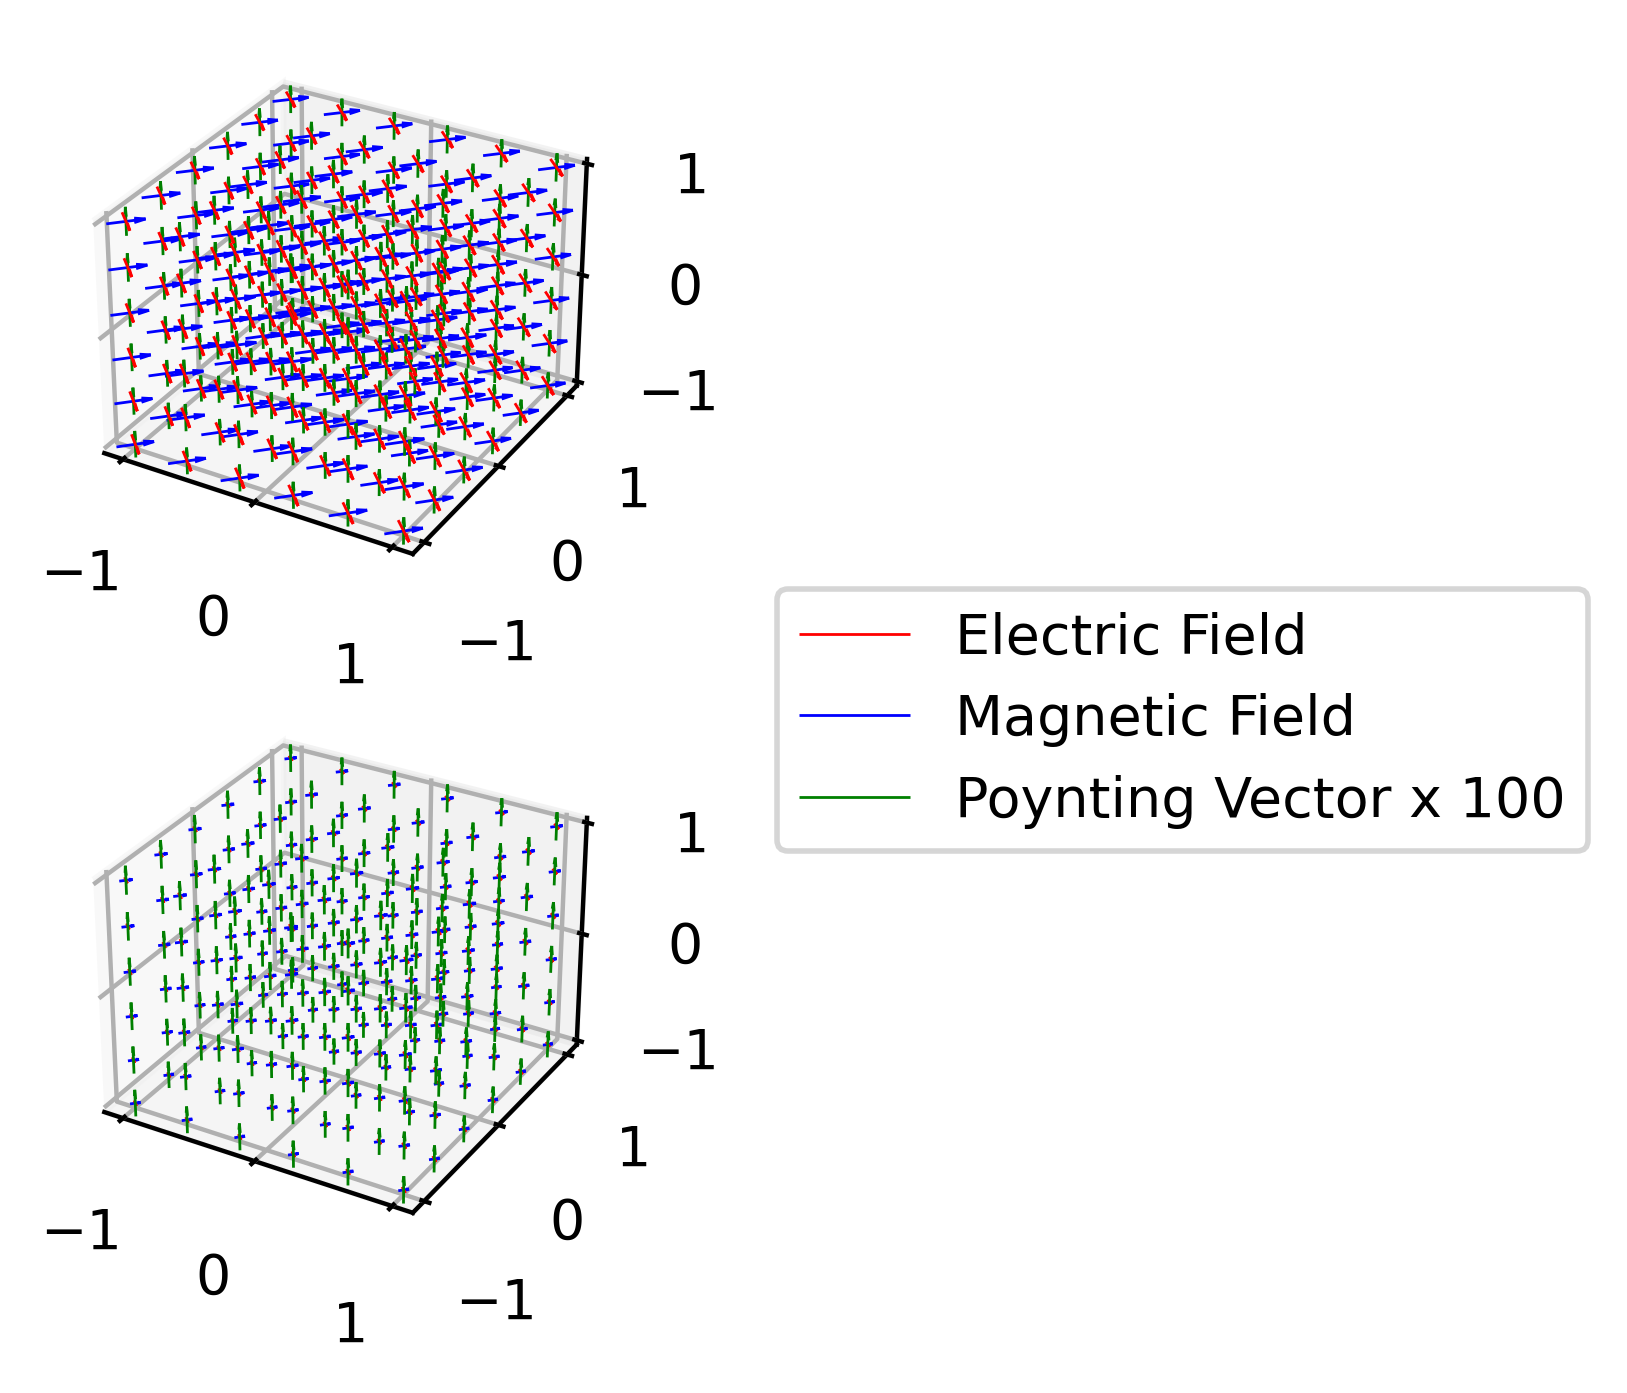

In [80]:
# Define the material.
mu = 1
epsilon = 1
n = np.sqrt(mu*epsilon)

# Define the wave vector.
# Give magnitude, lattitude, and longitdue.
k = 0.01 * np.pi
theta = 0.00 * np.pi
phi = 0.0 * np.pi

kx = k * np.sin(theta) * np.cos(phi)
ky = k * np.sin(theta) * np.sin(phi)
kz = k * np.cos(theta)

omega = k/n

# Set times for snapshots.
T = (2*np.pi) / omega
t0 = 0.00
t1 = t0 + 0.2*T

# Define the electric field, magnetic field, and Poynting vector
# for an electromagnetic plane wave.

# Give initial direction of electric field.
# Everything else is determined by this.
E0 = 0.25
B0 = np.sqrt(epsilon*mu) * E0

thetaE = 0.50 * np.pi
phiE = 0.25 * np.pi

Ex0 = E0 * np.sin(thetaE) * np.cos(phiE)
Ey0 = E0 * np.sin(thetaE) * np.sin(phiE)
Ez0 = E0 * np.cos(thetaE)

# Set phase difference between electric and magnetic fields.
alpha = 1.0 * np.pi

# Plot the results.
# Create a grid.
box_size = 1
num_points = 6

s = np.linspace(-box_size, box_size, num_points)
X, Y, Z = np.meshgrid(s,s,s)

# Create the figure.
fig = plt.figure(dpi=400)
ax1 = fig.add_subplot(211, projection='3d')
ax2 = fig.add_subplot(212, projection='3d')

# Compute the fields on a grid at the first time.
ex = Ex0 * np.exp(1j*(kx*X + ky*Y + kz*Z - omega*t0))
ey = Ey0 * np.exp(1j*(kx*X + ky*Y + kz*Z - omega*t0)) * np.exp(1j*alpha)
ez = Ez0 * np.exp(1j*(kx*X + ky*Y + kz*Z - omega*t0))

bx = (ky*ez - kz*ey)/omega
by = (kz*ex - kx*ez)/omega
bz = (kx*ey - ky*ex)/omega

sx = 1/(8*np.pi*mu) * (ey * bz.conj() - ez * by.conj())
sy = 1/(8*np.pi*mu) * (ez * bx.conj() - ex * bz.conj())
sz = 1/(8*np.pi*mu) * (ex * by.conj() - ey * bx.conj())

ax1.quiver3D(X,Y,Z, ex.real, ey.real, ez.real, pivot='middle',
             linewidth=0.5, color='red', label='Electric Field')
ax1.quiver3D(X,Y,Z, bx.real, by.real, bz.real, pivot='middle',
             linewidth=0.5, color='blue', label='Magnetic Field')
ax1.quiver3D(X,Y,Z, 100*sx.real, 100*sy.real, 100*sz.real, pivot='middle',
             linewidth=0.5, color='green', label='Poynting Vector x 100')

# Compute the fields on a grid at the second time.
ex = Ex0 * np.exp(1j*(kx*X + ky*Y + kz*Z - omega*t1))
ey = Ey0 * np.exp(1j*(kx*X + ky*Y + kz*Z - omega*t1)) * np.exp(1j*alpha)
ez = Ez0 * np.exp(1j*(kx*X + ky*Y + kz*Z - omega*t1))

bx = (ky*ez - kz*ey)/omega
by = (kz*ex - kx*ez)/omega
bz = (kx*ey - ky*ex)/omega

sx = 1/(8*np.pi) * (ey * bz.conj() - ez * by.conj())
sy = 1/(8*np.pi) * (ez * bx.conj() - ex * bz.conj())
sz = 1/(8*np.pi) * (ex * by.conj() - ey * bx.conj())

ax2.quiver3D(X,Y,Z, ex.real, ey.real, ez.real, pivot='middle',
             linewidth=0.5, color='red', label='Electric Field')
ax2.quiver3D(X,Y,Z, bx.real, by.real, bz.real, pivot='middle',
             linewidth=0.5, color='blue', label='Magnetic Field')
ax2.quiver3D(X,Y,Z, 100*sx.real, 100*sy.real, 100*sz.real, pivot='middle',
             linewidth=0.5, color='green', label='Poynting Vector x 100')
ax2.legend(bbox_to_anchor=(1.25, 1.25), loc='upper left')

Adjust the value of `t1` while keeping `t0` and the other parameters constant.

- What differences do you notice between the two plots as you adjust `t1`?

Changing t1 to add 2$\pi$ to each t0 makes both plots appear the same or in phase.

Adjust the direction of $\vec{k}$, as in the exercises above.  Observe the wave at different times.

- What differences do you notice between the two plots as you adjust `t1` and $\vec{k}$?

It seems like k sets the initial position and magnitude of the wave and t1 sets the time apart from each plot.  

In addition to changing the ***direction*** of $\vec{E}$, we can also change the ***relative phase*** of its components.  The code above allows us to describe waves of the form

\begin{align*}
Ex &= E_{x0} \, \cos \omega t \\
Ey &= E_{y0} \, \cos (\omega t + \alpha) \\
Ez &= E_{z0} \, \cos \omega t
\end{align*}

Reset $\vec{k}$ to point along the $z$-axis: $\theta = 0$ and $\phi = 0$.  Set $\alpha = \pi/2$.  Then, adjust the value of `t1` while keeping `t0` and the other parameters constant.

- What differences do you notice between the two plots as you adjust `t1`?
- How does $\alpha = \pi/2$ compare with $\alpha = 0$?

Increasing t1 by 0.1 moved each point on a slice of xy plane up the z direction.
When $\alpha = \pi/2$, the wave looked like it was spinning up the z axis and all magnitudes where equal
When $\alpha = 0$, the wave doesn't spin and looks like it only moves on a 2D plane

Explore other values of $\alpha$ and `t1`.

- How does $\alpha$ affect the patterns you observe?

It seems to affect the phase of the electric and magnetic fields

# Electromagnetic Movies

Observing plane waves is instructive, but a movie can illustrate the behavior even better.

The following code will create a movie of a plane wave and display it in this notebook.  It may take a little while to run.

If you get an error regarding `ffmpeg` use `conda` to install it.  Open a terminal or the "Anaconda Prompt" and type
```
conda install --channel conda-forge ffmpeg
```

In [162]:
# Name of file to store movie.
num_frames = 100

## Define the electromagnetic wave and plot its initial configuration.
# Define the material.
mu = 1
epsilon = 1
n = np.sqrt(mu*epsilon)

# Define the wave vector.
# Give magnitude, lattitude, and longitdue.
k = 0.050 * np.pi
theta = 0.00 * np.pi
phi = 0.00 * np.pi

kx = k * np.sin(theta) * np.cos(phi)
ky = k * np.sin(theta) * np.sin(phi)
kz = k * np.cos(theta)

omega = k/n

# Set times for snapshots.
T = (2*np.pi) / omega
dt = T / 50
t0 = 0.00

# Define the electric field, magnetic field, and Poynting vector
# for an electromagnetic plane wave.

# Give initial direction of electric field.
# Everything else is determined by this.
E0 = 0.50
B0 = np.sqrt(epsilon*mu) * E0

thetaE = 0.50 * np.pi
phiE = 0.33 * np.pi

Ex0 = E0 * np.sin(thetaE) * np.cos(phiE)
Ey0 = E0 * np.sin(thetaE) * np.sin(phiE)
Ez0 = E0 * np.cos(thetaE)

# Set phase difference between electric and magnetic fields.
alpha = .5 * np.pi

In [163]:
# Create a grid.
L = 1
N = 5

# Define function to compute fields on a grid.
def compute_fields(n, box_size=L, num_points=N):
    t = t0 + n * dt
    
    s = np.linspace(-box_size, box_size, num_points)
    X, Y, Z = np.meshgrid(s,s,s)

    
    # Compute the fields on a grid at the initial time.
    ex = Ex0 * np.exp(1j*(kx*X + ky*Y + kz*Z - omega*t))
    ey = Ey0 * np.exp(1j*(kx*X + ky*Y + kz*Z - omega*t)) * np.exp(1j*alpha)
    ez = Ez0 * np.exp(1j*(kx*X + ky*Y + kz*Z - omega*t))
    
    bx = (ky*ez - kz*ey)/omega
    by = (kz*ex - kx*ez)/omega
    bz = (kx*ey - ky*ex)/omega
    
    sx = 1/(8*np.pi*mu) * (ey * bz.conj() - ez * by.conj())
    sy = 1/(8*np.pi*mu) * (ez * bx.conj() - ex * bz.conj())
    sz = 1/(8*np.pi*mu) * (ex * by.conj() - ey * bx.conj())
        
    return X, Y, Z, ex.real, ey.real, ez.real, bx.real, by.real, bz.real, sx.real, sy.real, sz.real


# Create a figure for each time step.
# It is essential that the frames be named in alphabetical order.
# {:03d} will display integers with three digits and insert zeros if needed:
# '000_movie.jpg', '001_movie.jpg', etc.
file_name = "{:03d}_movie.jpg"

# Generate frames and save each figure as a separate .jpg file.
for i in range(num_frames):
    # Update fields.
    X,Y,Z,ex,ey,ez,bx,by,bz,sx,sy,sz = compute_fields(i)

    ## Set up the plot.
    fig = plt.figure(dpi=400)
    ax = fig.add_subplot(projection='3d')
    ax.set(xlim3d=(-1.1, 1.1), xlabel='X')
    ax.set(ylim3d=(-1.1, 1.1), ylabel='Y')
    ax.set(zlim3d=(-1.1, 1.1), zlabel='Z')
    ax.view_init(40,25)

    e_quivers = ax.quiver(X,Y,Z, ex.real, ey.real, ez.real, pivot='middle',
                          linewidth=0.5, color='red', label='Electric Field')
    b_quivers = ax.quiver(X,Y,Z, bx.real, by.real, bz.real, pivot='middle',
                          linewidth=0.5, color='blue', label='Magnetic Field')
    s_quivers = ax.quiver(X,Y,Z, 100*sx.real, 100*sy.real, 100*sz.real, pivot='middle',
                          linewidth=0.5, color='green', label='Poynting Vector x 100')

    ax.legend(bbox_to_anchor=(0.7, 1.1), loc='upper left')
    
    plt.savefig(file_name.format(i))
    #print("% saved ..." % file_name.format(i))
    plt.close(fig)

In [166]:
!ffmpeg -y -i %03d_movie.jpg -pix_fmt yuv420p movie.mp4

ffmpeg version 4.3.1 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 10.2.1 (GCC) 20200726
  configuration: --disable-static --enable-shared --enable-gpl --enable-version3 --enable-sdl2 --enable-fontconfig --enable-gnutls --enable-iconv --enable-libass --enable-libdav1d --enable-libbluray --enable-libfreetype --enable-libmp3lame --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-libopus --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libsrt --enable-libtheora --enable-libtwolame --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libzimg --enable-lzma --enable-zlib --enable-gmp --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvo-amrwbenc --enable-libmysofa --enable-libspeex --enable-libxvid --enable-libaom --enable-libgsm --enable-librav1e --disable-w32threads --enable-libmfx --enable-ffnvcodec --enable-cuda-llvm --enable-cuvid --enable-d3d11va 

In [168]:
# Play the movie within the notebook.
from IPython.display import HTML

HTML("""
    <video width="800" height="800" alt="test" controls>
        <source src=%s type="video/mp4">
    </video>
""" % "movie.mp4")

Even though it takes a while to create a video, play around with the field parameters and try to get an intuition for the kinds of electromagnetic fields associated with different polarizations ($\vec{E}_0$ and $\alpha$) and wave vectors ($\vec{k}$).

Changing the magnitude of $\vec{E}_0$ made all vectors grow in size, but mainly the Poynting vector. Changing $\alpha$ makes the wave travel in elliptical patterns.

- Give a set of parameters for an electromagnetic wave with **linear polarization**.
- Give a set of parameters for an electromagnetic wave with **circular polarization**.
- Give a set of parameters for an electromagnetic wave with **elliptical polarization**.

To linear polarization, $\alpha$ must be zero or factor of $\pi$.
To make a circular polarization $\alpha$ must be a factor of $\pi/2$ and 
To make an elliptical polarization $\alpha$ must be anything between but factors of $\pi$ or $\pi/2.

Why is it called an "electromagnetic plane wave"?

Because the wave travels along a plane.

# Reflection and Summary

- What are the major takeaways of this assignment for you?
- What was the most difficult part of this assignment?
- What was the most interesting part of this assignment?
- What questions do you have?

This assignment gave me a way to visualize and plot electromagnetic fields. It also help me see what equations to use for electromagnetic fields.
The most difficult part of this assignment was interpreting the graphs. Looking at so many waves at once makes it difficult to keep track of whats changing.
The most interesting part was making the movie of the waves.
I cant seem to get a perfect circle from changing the parameters. Is this actually circular motion even though it doesn't look like it?